In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score

In [2]:
train_data = pd.read_csv("/content/mnist_train.csv")
test_data = pd.read_csv("/content/mnist_test.csv")

# **Understanding the structure of the dataset**

In [ ]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


In [ ]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
# Check the shape of the datasets
print("Train Dataset Shape:", train_data.shape)
print("Test Dataset Shape:", test_data.shape)

Train Dataset Shape: (2295, 785)
Test Dataset Shape: (4049, 785)


In [ ]:
# Column names
print("Train Columns:", train_data.columns)
print("Test Columns:", test_data.columns)

Train Columns: Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', 'label'],
      dtype='object', length=785)
Test Columns: Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', 'label'],
      dtype='object', length=785)


In [ ]:
# Data types of each column
print("Train Data Types:\n", train_data.dtypes)
print("Test Data Types:\n", test_data.dtypes)


Train Data Types:
 0          int64
1          int64
2          int64
3          int64
4          int64
          ...   
780      float64
781      float64
782      float64
783      float64
label    float64
Length: 785, dtype: object
Test Data Types:
 0          int64
1          int64
2          int64
3          int64
4          int64
          ...   
780      float64
781      float64
782      float64
783      float64
label    float64
Length: 785, dtype: object


In [ ]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
count,2869.0,2869.0,2869.0,2869.0,2869.0,2869.0,2869.0,2869.0,2869.0,2869.0,...,2868.000000,2868.000000,2868.000000,2868.000000,2868.0,2868.0,2868.0,2868.0,2868.0,2868.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.093096,0.053696,0.088215,0.063808,0.0,0.0,0.0,0.0,0.0,4.450837
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.563767,2.678033,3.690441,2.522679,0.0,0.0,0.0,0.0,0.0,2.851643
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156.000000,143.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0,9.000000


In [ ]:
test_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
count,1156.0,1156.0,1156.0,1156.0,1156.0,1156.0,1156.0,1156.0,1156.0,1156.0,...,1155.000000,1155.0,1155.0,1155.0,1155.0,1155.0,1155.0,1155.0,1155.0,1155.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.110823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.367965
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.766335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.833725
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,128.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000


In [12]:
# Initialize Models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=50, alpha=0.001, solver='adam', random_state=42)
}

In [13]:
# Separate features (pixels) and labels (labels are in the last column)

X_train = train_data.iloc[:, :-1].values  # All columns except the last (features)
y_train = train_data.iloc[:, -1].values   # Only the last column (labels)

X_test = test_data.iloc[:, :-1].values    # All columns except the last (features)
y_test = test_data.iloc[:, -1].values     # Only the last column (labels)

In [15]:
# Count NaN values in labels
print("Missing values in y_train:", np.isnan(y_train).sum())
print("Missing values in y_test:", np.isnan(y_test).sum())


Missing values in y_train: 0
Missing values in y_test: 0


In [14]:
# Compute median of y_train (ignoring NaN values)
median_value = np.nanmedian(y_train)

# Fill missing values with the median
y_train = np.where(np.isnan(y_train), median_value, y_train)
y_test = np.where(np.isnan(y_test), median_value, y_test)

print(y_train)
print(y_test)


[5. 0. 4. 1. 9. 2. 1. 3. 1. 4. 3. 5. 3. 6. 1. 7. 2. 8. 6. 9. 4. 0. 9. 1.
 1. 2. 4. 3. 2. 7. 3. 8. 6. 9. 0. 5. 6. 0. 7. 6. 1. 8. 7. 9. 3. 9. 8. 5.
 9. 3. 3. 0. 7. 4. 9. 8. 0. 9. 4. 1. 4. 4. 6. 0. 4. 5. 6. 1. 0. 0. 1. 7.
 1. 6. 3. 0. 2. 1. 1. 7. 9. 0. 2. 6. 7. 8. 3. 9. 0. 4. 6. 7. 4. 6. 8. 0.
 7. 8. 3. 1. 5. 7. 1. 7. 1. 1. 6. 3. 0. 2. 9. 3. 1. 1. 0. 4. 9. 2. 0. 0.
 2. 0. 2. 7. 1. 8. 6. 4. 1. 6. 3. 4. 5. 9. 1. 3. 3. 8. 5. 4. 7. 7. 4. 2.
 8. 5. 8. 6. 7. 3. 4. 6. 1. 9. 9. 6. 0. 3. 7. 2. 8. 2. 9. 4. 4. 6. 4. 9.
 7. 0. 9. 2. 9. 5. 1. 5. 9. 1. 2. 3. 2. 3. 5. 9. 1. 7. 6. 2. 8. 2. 2. 5.
 0. 7. 4. 9. 7. 8. 3. 2. 1. 1. 8. 3. 6. 1. 0. 3. 1. 0. 0. 1. 7. 2. 7. 3.
 0. 4. 6. 5. 2. 6. 4. 7. 1. 8. 9. 9. 3. 0. 7. 1. 0. 2. 0. 3. 5. 4. 6. 5.
 8. 6. 3. 7. 5. 8. 0. 9. 1. 0. 3. 1. 2. 2. 3. 3. 6. 4. 7. 5. 0. 6. 2. 7.
 9. 8. 5. 9. 2. 1. 1. 4. 4. 5. 6. 4. 1. 2. 5. 3. 9. 3. 9. 0. 5. 9. 6. 5.
 7. 4. 1. 3. 4. 0. 4. 8. 0. 4. 3. 6. 8. 7. 6. 0. 9. 7. 5. 7. 2. 1. 1. 6.
 8. 9. 4. 1. 5. 2. 2. 9. 0. 3. 9. 6. 7. 2. 0. 3. 5.

In [17]:
# Count NaN values in labels
print("Missing values in X_train:", np.isnan(X_train).sum())
print("Missing values in X_test:", np.isnan(X_test).sum())


Missing values in X_train: 0
Missing values in X_test: 0


In [16]:
# Compute median of y_train (ignoring NaN values)
median_value = np.nanmedian(X_train)

# Fill missing values with the median
X_train = np.where(np.isnan(X_train), median_value, X_train)
X_test = np.where(np.isnan(X_test), median_value, X_test)

print(X_train)
print(X_test)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
# Train and Evaluate Models
results = {}
for name, model in models.items():
    print(f"\n {name} ")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


 Decision Tree 

 Logistic Regression 


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



 KNN 

 MLP Neural Network 


In [19]:
for name, model in models.items():
    print(f"Evaluating {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("="*50)
    print(f"Model: {name}")  # This will explicitly print which model's results are being shown
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("="*50)



Evaluating Decision Tree...
Model: Decision Tree
Accuracy: 0.5501
Precision: 0.5583
Recall: 0.5501
F1-score: 0.5498
Confusion Matrix:
[[110   1   3   5   3   7  10   3   6   2]
 [  0 157   9  21   0   5   4   4   0   1]
 [  4  11  99   4  10  10  16  28  12   0]
 [ 12   6   7  95   6  15   1   9  13  15]
 [  3   3   6  13  90   4  10  18   7  41]
 [  7   1   5  25   7  63  16   9   5  16]
 [  4   3  17   9   3   8  78   6  14   8]
 [  1   4  13   6   6   4   5 110   2  26]
 [  5   5  19  11   6  14  15  12  60  19]
 [  3   2   6   6  12   5   1  35   7  93]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74       150
         1.0       0.81      0.78      0.80       201
         2.0       0.54      0.51      0.52       194
         3.0       0.49      0.53      0.51       179
         4.0       0.63      0.46      0.53       195
         5.0       0.47      0.41      0.44       154
         6.0       0.50      0.5

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model: Logistic Regression
Accuracy: 0.7869
Precision: 0.7886
Recall: 0.7869
F1-score: 0.7863
Confusion Matrix:
[[138   0   3   1   0   1   2   4   1   0]
 [  0 194   1   0   0   1   2   2   1   0]
 [  3  10 154   1   3   0   7   4   9   3]
 [  0   1   3 135   2  23   2   9   2   2]
 [  0   1   2   2 146   0  11   2   3  28]
 [  3   0   3   3  10 101   2  11  17   4]
 [  4   1   5   0   1   6 130   0   3   0]
 [  1   3  10   7   2   0   0 141   2  11]
 [  4   2   1   7   5  12   3   6 106  20]
 [  0   0   1  10   8   0   0  26   4 121]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       150
         1.0       0.92      0.97      0.94       201
         2.0       0.84      0.79      0.82       194
         3.0       0.81      0.75      0.78       179
         4.0       0.82      0.75      0.78       195
         5.0       0.70      0.66      0.68       154
         6.0       0.82      0.87      0.84       150


In [20]:
# Hyperparameter tunning for Decision tree using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_dt = grid_search.best_estimator_

print(f"Best Decision Tree Parameters: {grid_search.best_params_}")
print("Best dt Accuracy:", grid_search.best_score_)


Best Decision Tree Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best dt Accuracy: 0.6417391304347826


In [21]:
# Hyperparameter tunning for Logistic Regression using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10], #C: Inverse of regularization strength (higher values reduce regularization)
    'solver': ['lbfgs', 'saga', 'liblinear'], #solver: Optimization algorithm for training.
    'max_iter': [100, 200, 500] #max_iter: Maximum number of iterations.
}

log_grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
log_grid.fit(X_train, y_train)

best_lr = log_grid.best_estimator_
print(f"Best Logistic Regression Parameters: {log_grid.best_params_}")
print("Best Logistic Regression Accuracy:", log_grid .best_score_)


Best Logistic Regression Parameters: {'C': 0.1, 'max_iter': 100, 'solver': 'saga'}
Best Logistic Regression Accuracy: 0.8452173913043477


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [22]:
# Hyperparameter tunning for KNN using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid
knn_params = {
    'n_neighbors': [3, 5, 7, 9],  # Testing different K values
    'weights': ['uniform', 'distance'],  # Distance-based weighting
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
}

# Perform Grid Search
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train, y_train)

# Best model
best_knn = knn_grid.best_estimator_
print("Best Parameters for k-NN:", knn_grid.best_params_)
print("Best k-NN Accuracy:", knn_grid.best_score_)



Best Parameters for k-NN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best k-NN Accuracy: 0.8539130434782608


In [23]:
# Hyperparameter tunning for MLP using GridSearchCV
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Different layer structures
    'activation': ['relu', 'tanh'],  # Testing activation functions
    'solver': ['adam', 'sgd'],  # Optimizers
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'learning_rate': ['constant', 'adaptive']  # Adjust learning rate strategy
}

# Perform Grid Search
mlp = MLPClassifier(max_iter=500)  # Increase iterations for convergence
mlp_grid = GridSearchCV(mlp, mlp_params, cv=5, scoring='accuracy', n_jobs=-1)
mlp_grid.fit(X_train, y_train)
# Best model
best_mlp = mlp_grid.best_estimator_
print("Best Parameters for MLP:", mlp_grid.best_params_)
print("Best MLP Accuracy:", mlp_grid.best_score_)



Best Parameters for MLP: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best MLP Accuracy: 0.8243478260869566


In [24]:
#Evaluation of model after hypertunning
models = {
    'Decision Tree': best_dt,
    'Logistic Regression': best_lr,
    'k-NN': best_knn,
    'MLP': best_mlp
}

for name, model in models.items():
    model.fit(X_train, y_train)  # Ensure the model is retrained with the best hyperparameters
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Precision: {precision:.4f}")
    print(f"{name} Recall: {recall:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")
    print(f"{name} Confusion Matrix:")
    print(conf_matrix)
    print(f"{name} Classification Report:")
    print(report)
    print("-" * 50)

Decision Tree Accuracy: 0.5559
Decision Tree Precision: 0.5579
Decision Tree Recall: 0.5559
Decision Tree F1 Score: 0.5536
Decision Tree Confusion Matrix:
[[108   0   2   6   6   8  13   3   3   1]
 [  0 155  12  21   2   2   1   5   3   0]
 [  3  14 101   8   7   6  20  25   9   1]
 [  8   4   9  97   6  23   1   4  10  17]
 [  5   2   7  13  99   4  12  15   6  32]
 [  7   7   4  17  10  59   9   4  15  22]
 [  8   6  19   2   5   7  76   3  15   9]
 [  1  13  14   6   6   2   4 105   2  24]
 [  2   5  26  15   7  16   9   9  57  20]
 [  1   2   8   9  10   1   4  20   7 108]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74       150
         1.0       0.75      0.77      0.76       201
         2.0       0.50      0.52      0.51       194
         3.0       0.50      0.54      0.52       179
         4.0       0.63      0.51      0.56       195
         5.0       0.46      0.38      0.42       15

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Accuracy: 0.7972
Logistic Regression Precision: 0.8001
Logistic Regression Recall: 0.7972
Logistic Regression F1 Score: 0.7968
Logistic Regression Confusion Matrix:
[[139   0   2   1   0   1   2   4   1   0]
 [  0 198   1   0   0   1   1   0   0   0]
 [  3   7 156   1   3   0   8   4  10   2]
 [  0   1   2 135   0  27   2   7   3   2]
 [  0   1   1   1 146   0  11   1   2  32]
 [  4   1   3   2  10 101   2  12  16   3]
 [  4   1   5   0   0   8 130   0   2   0]
 [  1   3   7   7   2   0   0 142   2  13]
 [  3   3   3   9   2  16   3   6 107  14]
 [  0   0   1   7   6   0   0  24   2 130]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91       150
         1.0       0.92      0.99      0.95       201
         2.0       0.86      0.80      0.83       194
         3.0       0.83      0.75      0.79       179
         4.0       0.86      0.75      0.80       195
         5.0    

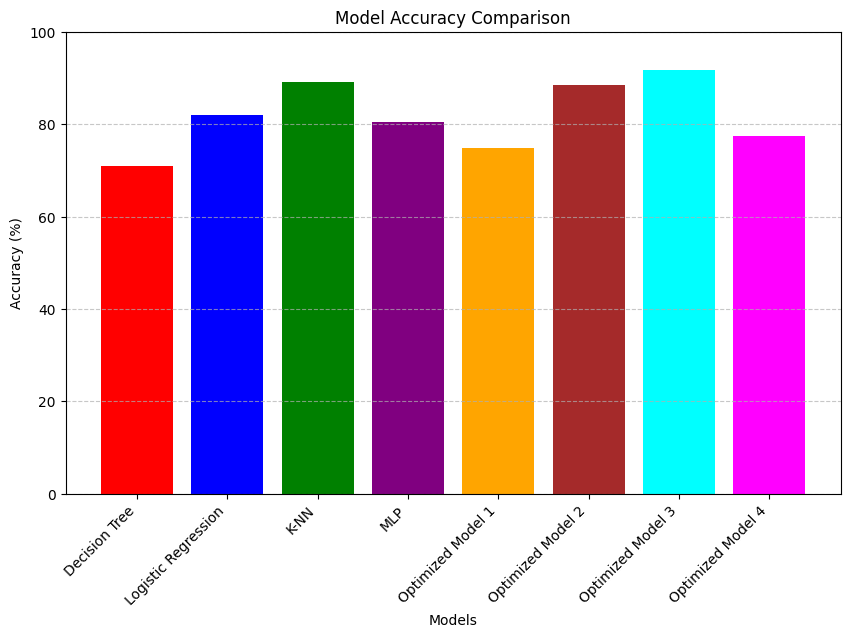

In [30]:
# Model names
models = ["Decision Tree", "Logistic Regression", "K-NN", "MLP",
          "Optimized Model 1", "Optimized Model 2", "Optimized Model 3",
          "Optimized Model 4"]

# Accuracy values (Ensure values are correct)
accuracies = [70.85, 81.98, 89.22, 80.48, 74.84, 88.39, 91.76, 77.42]  # Ensure values are percentages

# Ensure the number of colors matches the number of models
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'cyan', 'magenta']

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=colors)

plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha="right")

# Adjust y-axis limits to show all bars
plt.ylim(0, 100)  # Set from 0 to 100 to show full range

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

